In [120]:
import pandas as pd
import math
import sys

In [3]:
df = pd.read_csv('dataset_test.csv')

In [109]:
df.describe()

,Index,Hogwarts House,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,400.000000,0.0,387.000000,387.000000,389.000000,392.000000,394.000000,390.000000,392.000000,389.000000,389.000000,390.000000,392.000000,400.000000,400.000000
mean,199.500000,NaN,50088.971576,48.155326,1.385517,-0.537843,3.411071,-220.169594,495.937543,2.829816,1030.885777,5.776860,0.022985,-243.181109,23.367450
std,115.614301,NaN,15472.748364,512.537781,5.055295,5.118762,3.891192,497.668782,101.657418,4.317209,45.346899,3.217625,1.019005,8.727190,95.185944
min,0.000000,NaN,4536.000000,-802.725180,-9.687662,-8.700635,-8.183000,-1041.323658,319.360250,-7.189090,906.932050,-1.162060,-2.871119,-259.866780,-143.520000
25%,99.750000,NaN,40167.500000,-483.719690,-4.183731,-5.209348,3.528750,-580.049325,400.719831,2.227669,1028.499974,3.230372,-0.646285,-250.150987,-38.475000
50%,199.500000,NaN,49238.000000,292.108738,3.630490,-2.915654,4.703000,-407.549022,484.102477,4.290164,1047.648405,5.731330,0.059416,-244.758710,-2.555000
75%,299.250000,NaN,60157.000000,508.713093,5.405685,4.785055,5.571000,221.387925,591.372101,5.662488,1060.367924,8.136907,0.711248,-232.798160,45.332500
max,399.000000,NaN,99744.000000,870.063498,9.678462,8.027252,8.604000,939.317135,667.674165,10.366995,1099.966073,13.390013,3.205525,-226.003820,282.430000


In [72]:
import csv

In [75]:
def read_file(csv_file):
    data = []
    with open(csv_file, mode='r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            data.append(row)
    return data

In [61]:
def check_numeric(column, data):
    had_value = False
    for row in data[1:]:
        if row[column] == "":
            continue
        had_value = True
        try:
            float(row[column])
        except ValueError:
            return False
    return had_value

In [69]:
def numeric_dataset(data):
    new_data = []
    for i in range(len(data[0])):
        if (check_numeric(i, data)):
            column_values = [row[i] for row in data]
            new_data.append(column_values)
    return new_data

In [76]:
data = read_file("dataset_test.csv")

In [78]:
new_data = numeric_dataset(data)

In [86]:
def count(data):
    counts = []
    for col in data:
        count = 0
        for row in col[1:]:
            if row != "":
                count += 1
        counts.append(count)
    return counts

In [87]:
count(new_data)

[400, 387, 387, 389, 392, 394, 390, 392, 389, 389, 390, 392, 400, 400]

In [93]:
def mean(data):
    means = []
    for col in data:
        mean = 0
        count = 0
        for row in col[1:]:
            if row != "":
                count += 1
                mean += float(row)
        mean /= count
        means.append(mean)
    return means

In [118]:
def std(data):
    stds = []
    means = mean(data)
    for i, col in enumerate(data):
        m = means[i]
        count = 0
        diff = 0
        for row in col[1:]:
            if row != "":
                diff += (float(row) - m) ** 2
                count += 1
        if count > 1:
            diff = math.sqrt(diff / (count - 1))
            stds.append(diff)
        else:
            stds.append(None)
    return stds


In [151]:
def minim(data):
    mins = []
    for i, col in enumerate(data):
        mini = sys.float_info.max
        for row in col[1:]:
            if row != "":
                if (float(row) < mini):
                    mini = float(row)
        mins.append(mini)
    return mins

In [152]:
def maxim(data):
    maxs = []
    for i, col in enumerate(data):
        maxi = -sys.float_info.max
        for row in col[1:]:
            if row != "":
                if (float(row) > maxi):
                    maxi = float(row)
        maxs.append(maxi)
    return maxs

In [219]:
def first_percentile(data):
    firsts = []
    for i, col in enumerate(data):
        clean = [s for s in col if s]
        new_col = sorted([float(x) for x in clean[1:]])
        n = len(new_col)
        position = (n - 1) * 0.25

        lower_index = int(position)
        upper_index = lower_index + 1
        if upper_index < n:
            fraction = position - lower_index
            firsts.append(new_col[lower_index] + fraction * (new_col[upper_index] - new_col[lower_index]))
        else:
            firsts.append(new_col[lower_index])
    return firsts


In [224]:
def second_percentile(data):
    seconds = []
    for i, col in enumerate(data):
        clean = [s for s in col if s]
        new_col = sorted([float(x) for x in clean[1:]])
        n = len(new_col)
        position = (n - 1) * 0.50

        lower_index = int(position)
        upper_index = lower_index + 1
        if upper_index < n:
            fraction = position - lower_index
            seconds.append(new_col[lower_index] + fraction * (new_col[upper_index] - new_col[lower_index]))
        else:
            seconds.append(new_col[lower_index])
    return seconds

In [225]:
def third_percentile(data):
    thirds = []
    for i, col in enumerate(data):
        clean = [s for s in col if s]
        new_col = sorted([float(x) for x in clean[1:]])
        n = len(new_col)
        position = (n - 1) * 0.75

        lower_index = int(position)
        upper_index = lower_index + 1
        if upper_index < n:
            fraction = position - lower_index
            thirds.append(new_col[lower_index] + fraction * (new_col[upper_index] - new_col[lower_index]))
        else:
            thirds.append(new_col[lower_index])
    return thirds

In [238]:
import pandas as pd

def describe(data):
    counts = count(data)
    means = mean(data)
    stds = std(data)
    mins = minim(data)
    maxs = maxim(data)
    firsts = first_percentile(data)
    seconds = second_percentile(data)
    thirds = third_percentile(data)
    
    summary_dict = {
        'count': counts,
        'mean': means,
        'std': stds,
        'min': mins,
        '25%': firsts,
        '50%': seconds,
        '75%': thirds,
        'max': maxs
    }
    
    summary_df = pd.DataFrame(summary_dict)
    print(summary_df)

In [239]:
describe(new_data)

    count          mean           std          min           25%  \
0     400    199.500000    115.614301     0.000000     99.750000   
1     387  50088.971576  15472.748364  4536.000000  40167.500000   
2     387     48.155326    512.537781  -802.725180   -483.719690   
3     389      1.385517      5.055295    -9.687662     -4.183731   
4     392     -0.537843      5.118762    -8.700635     -5.209348   
5     394      3.411071      3.891192    -8.183000      3.528750   
6     390   -220.169594    497.668782 -1041.323658   -580.049325   
7     392    495.937543    101.657418   319.360250    400.719831   
8     389      2.829816      4.317209    -7.189090      2.227669   
9     389   1030.885777     45.346899   906.932050   1028.499974   
10    390      5.776860      3.217625    -1.162060      3.230372   
11    392      0.022985      1.019005    -2.871119     -0.646285   
12    400   -243.181109      8.727190  -259.866780   -250.150987   
13    400     23.367450     95.185944  -143.5200

In [267]:
import matplotlib.pyplot as plt

def plot_histogram(data, course_column_index, score_column_index):
    transposed_data = list(zip(*data))
    
    courses = set(transposed_data[course_column_index])
    for course in courses:
        course_data = [transposed_data[score_column_index][i] for i in range(len(transposed_data[course_column_index])) if transposed_data[course_column_index][i] == course]
        plt.hist(course_data, bins=1, alpha=0.5, label=course)
    
    plt.xlabel('Scores')
    plt.ylabel('Frequency')
    plt.title('Score Distribution by Course')
    plt.legend(loc='upper right')
    plt.show()

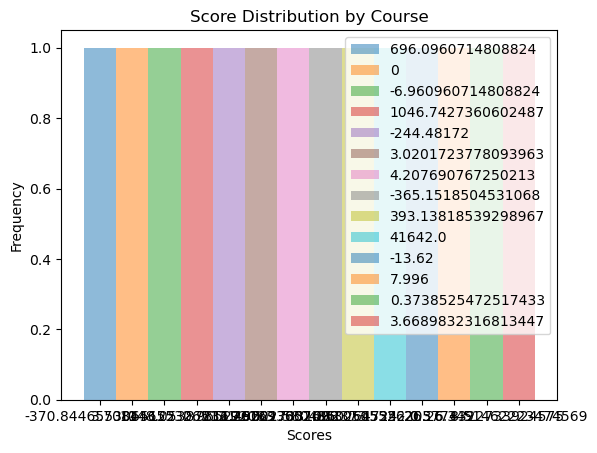

In [268]:
plot_histogram(new_data, 1, 2)

In [244]:
new_data

[['Index',
  '0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67',
  '68',
  '69',
  '70',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '80',
  '81',
  '82',
  '83',
  '84',
  '85',
  '86',
  '87',
  '88',
  '89',
  '90',
  '91',
  '92',
  '93',
  '94',
  '95',
  '96',
  '97',
  '98',
  '99',
  '100',
  '101',
  '102',
  '103',
  '104',
  '105',
  '106',
  '107',
  '108',
  '109',
  '110',
  '111',
  '112',
  '113',
  '114',
  '115',
  '116',
  '117',
  '118',
  '119',
  '120',
  '121',
 